# EDA - 1: Bike Details Dataset

### The dataset provided focuses on used bikes, capturing various attributes to analyze the second-hand bike market. This dataset helps understand factors influencing resale prices, usage patterns, and market trends for used bikes.
### The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale platforms.


# 1. What is the range of selling prices in the dataset?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
bike_data = pd.read_csv('BIKE DETAILS.csv')

selling_price_range = bike_data['selling_price'].min(), bike_data['selling_price'].max()
print(f"Range of Selling Prices: {selling_price_range}")

Range of Selling Prices: (5000, 760000)


# 2. What is the median selling price for bikes in the dataset?

In [3]:
median_selling_price = bike_data['selling_price'].median()
print(f"Median Selling Price: {median_selling_price}")

Median Selling Price: 45000.0


# 3. What is the most common seller type?

In [4]:
most_common_seller_type = bike_data['seller_type'].mode()[0]
print(f"Most Common Seller Type: {most_common_seller_type}")

Most Common Seller Type: Individual


# 4. How many bikes have driven more than 50,000 kilometers?

In [5]:
bikes_above_50000_km = bike_data[bike_data['km_driven'] > 50000].shape[0]
print(f"Bikes with more than 50,000 km driven: {bikes_above_50000_km}")

Bikes with more than 50,000 km driven: 170


# 5. What is the average km_driven value for each ownership type?

In [8]:
avg_km_driven_by_owner = bike_data.groupby('owner')['km_driven'].mean()
print(f"Average km_driven for each Ownership Type:\n{avg_km_driven_by_owner}")

Average km_driven for each Ownership Type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


# 6. What proportion of bikes are from the year 2015 or older?

In [9]:
bikes_2015_or_older = bike_data[bike_data['year'] <= 2015].shape[0]
proportion_2015_or_older = bikes_2015_or_older / bike_data.shape[0]
print(f"Proportion of bikes from year 2015 or older: {proportion_2015_or_older:.2f}")

Proportion of bikes from year 2015 or older: 0.57


# 7. What is the trend of missing values across the dataset?

In [10]:
missing_values = bike_data.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


# 8. What is the highest ex_showroom_price recorded, and for which bike?

In [11]:
max_ex_showroom_price = bike_data.loc[bike_data['ex_showroom_price'].idxmax()]
print(f"Highest ex_showroom_price recorded:\n{max_ex_showroom_price}")

Highest ex_showroom_price recorded:
name                 Harley-Davidson Street Bob
selling_price                            750000
year                                       2013
seller_type                          Individual
owner                                 2nd owner
km_driven                                 12000
ex_showroom_price                     1278000.0
Name: 134, dtype: object


# 9. What is the total number of bikes listed by each seller type?

In [12]:
bikes_by_seller_type = bike_data.groupby('seller_type').size()
print(f"Total number of bikes listed by each seller type:\n{bikes_by_seller_type}")

Total number of bikes listed by each seller type:
seller_type
Dealer           6
Individual    1055
dtype: int64


# 10. What is the relationship between selling_price and km_driven for first-owner bikes?

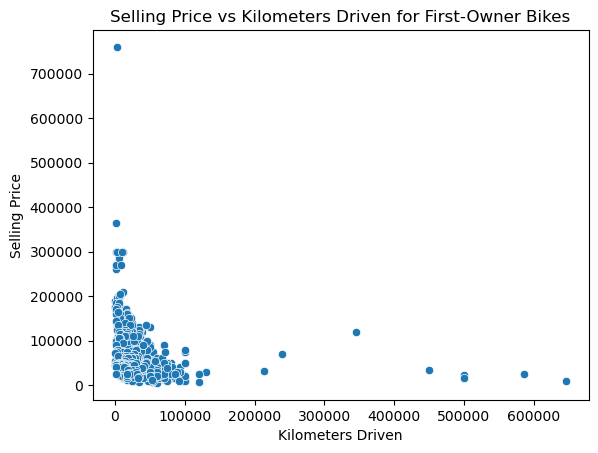

In [13]:
first_owner_bikes = bike_data[bike_data['owner'] == '1st owner']
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes)
plt.title('Selling Price vs Kilometers Driven for First-Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

# 11. Identify and remove outliers in the km_driven column using the IQR method?

In [14]:
Q1 = bike_data['km_driven'].quantile(0.25)
Q3 = bike_data['km_driven'].quantile(0.75)
IQR = Q3 - Q1
outliers = bike_data[(bike_data['km_driven'] < (Q1 - 1.5 * IQR)) | (bike_data['km_driven'] > (Q3 + 1.5 * IQR))]
bike_data_cleaned = bike_data[~bike_data.index.isin(outliers.index)]
print(f"Number of outliers removed: {outliers.shape[0]}")

Number of outliers removed: 39


# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price?

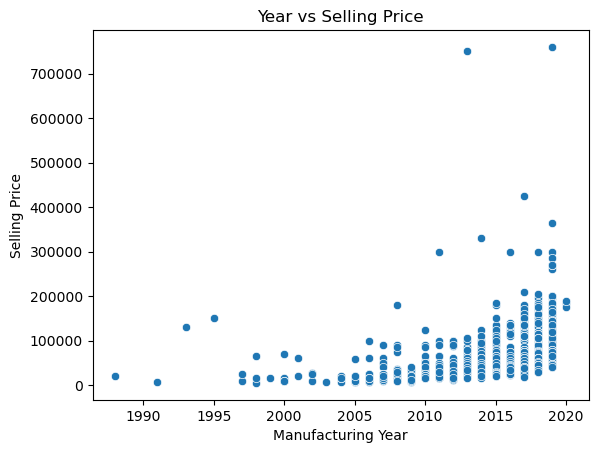

In [15]:
sns.scatterplot(x='year', y='selling_price', data=bike_data)
plt.title('Year vs Selling Price')
plt.xlabel('Manufacturing Year')
plt.ylabel('Selling Price')
plt.show()

# 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

In [16]:
current_year = 2025
bike_data['age'] = current_year - bike_data['year']
bike_data['depreciation'] = bike_data['ex_showroom_price'] - bike_data['selling_price']
avg_depreciation_by_age = bike_data.groupby('age')['depreciation'].mean()
print(f"Average depreciation by bike's age:\n{avg_depreciation_by_age}")

Average depreciation by bike's age:
age
5    -34260.000000
6      2954.562500
7     13023.194805
8     22306.082353
9     28328.190476
10    28013.275000
11    34505.606061
12    43086.886792
13    37317.648649
14    47102.666667
15    45658.928571
16    38227.785714
17    54732.428571
18    42399.000000
19    39664.500000
20    44852.000000
21    36852.000000
22             NaN
23             NaN
24    34852.000000
25             NaN
26             NaN
27             NaN
28             NaN
30             NaN
32             NaN
34             NaN
37             NaN
Name: depreciation, dtype: float64


# 14. Which bike names are priced significantly above the average price for their manufacturing year?

In [17]:
avg_price_by_year = bike_data.groupby('year')['selling_price'].mean()
bikes_above_avg_price = bike_data[bike_data.apply(lambda x: x['selling_price'] > avg_price_by_year[x['year']], axis=1)]
print(f"Bikes priced significantly above the average price for their manufacturing year:\n{bikes_above_avg_price[['name', 'selling_price', 'year']]}")

Bikes priced significantly above the average price for their manufacturing year:
                                      name  selling_price  year
0                Royal Enfield Classic 350         175000  2019
2      Royal Enfield Classic Gunmetal Grey         150000  2018
3        Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015
7     Royal Enfield Bullet 350 [2007-2011]         180000  2008
13                           Yamaha YZF R3         365000  2019
...                                    ...            ...   ...
1004                  Bajaj Pulsar  NS 200          60000  2016
1005                    TVS Apache RTR 160          60000  2014
1008                    Bajaj Pulsar 220 F          52000  2012
1012                   Bajaj Pulsar NS 200          50000  2014
1023                Bajaj Avenger 220 dtsi          45000  2012

[334 rows x 3 columns]


# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

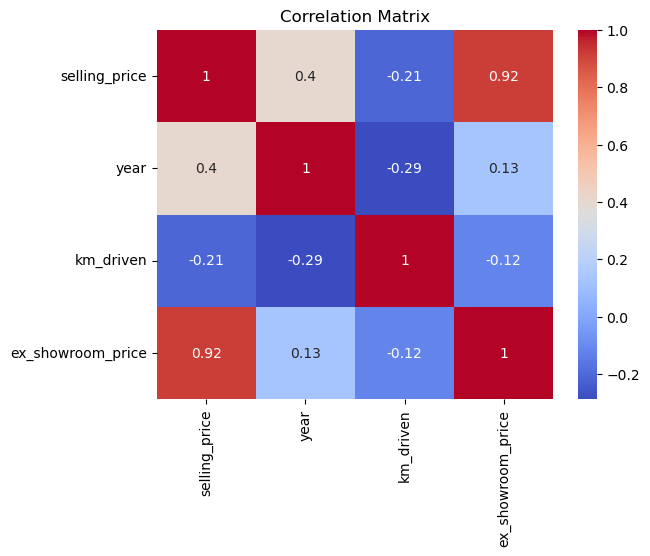

In [18]:
correlation_matrix = bike_data[['selling_price', 'year', 'km_driven', 'ex_showroom_price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# EDA - 2 : Car Sale Dataset

### The dataset provided focuses on used car sales, capturing various attributes to analyze the second-hand car market. This dataset provides insights into factors affecting resale value, trends in the used car industry, and consumer behavior.

### The dataset is available on Kaggle, representing data commonly seen in online car resale platforms.

### The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis, and understanding customer preferences.

# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
car_data = pd.read_csv('Car Sale.csv')

avg_price_by_dealer = car_data.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print(f"Average selling price by dealer:\n{avg_price_by_dealer}")

Average selling price by dealer:
Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.56

# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

In [21]:
price_variation_by_company = car_data.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print(f"Car brand with the highest price variation:\n{price_variation_by_company.head(1)}")

Car brand with the highest price variation:
Company
Lincoln    19658.050211
Name: Price ($), dtype: float64


# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

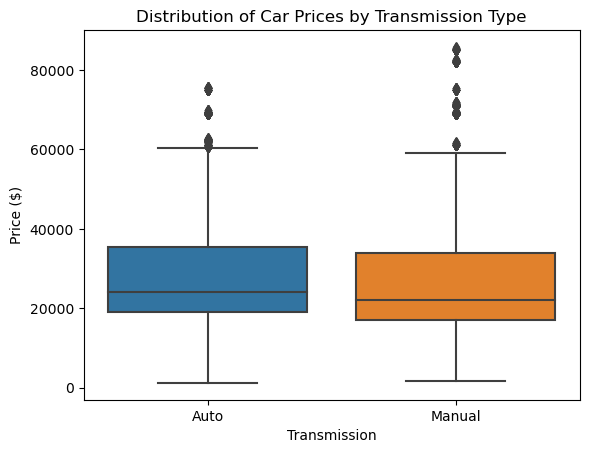

In [23]:
sns.boxplot(x='Transmission', y='Price ($)', data=car_data)
plt.title('Distribution of Car Prices by Transmission Type')
plt.show()

# 4. What is the distribution of car prices across different regions?

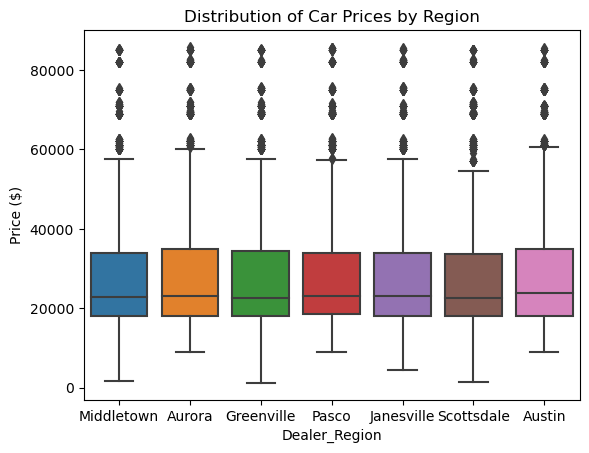

In [24]:
sns.boxplot(x='Dealer_Region', y='Price ($)', data=car_data)
plt.title('Distribution of Car Prices by Region')
plt.show()

# 5. What is the distribution of cars based on body styles?

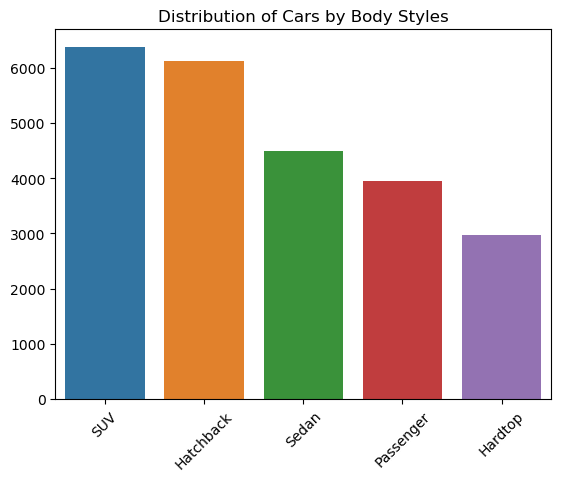

In [25]:
body_style_distribution = car_data['Body Style'].value_counts()
sns.barplot(x=body_style_distribution.index, y=body_style_distribution.values)
plt.title('Distribution of Cars by Body Styles')
plt.xticks(rotation=45)
plt.show()

# 6. How does the average selling price of cars vary by customer gender and annual income?

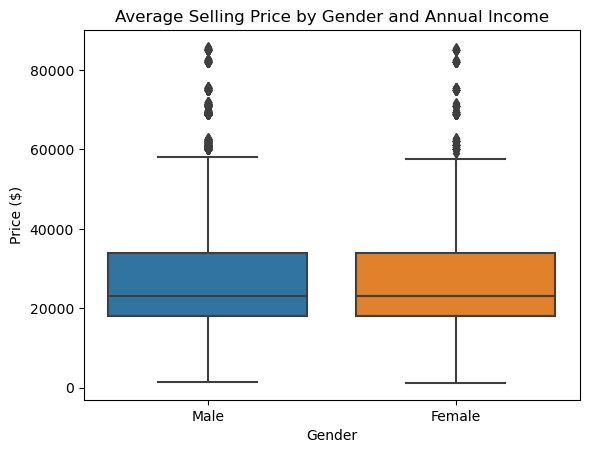

In [26]:
avg_price_by_gender_income = car_data.groupby('Gender')['Price ($)'].mean()
sns.boxplot(x='Gender', y='Price ($)', data=car_data)
plt.title('Average Selling Price by Gender and Annual Income')
plt.show()

# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

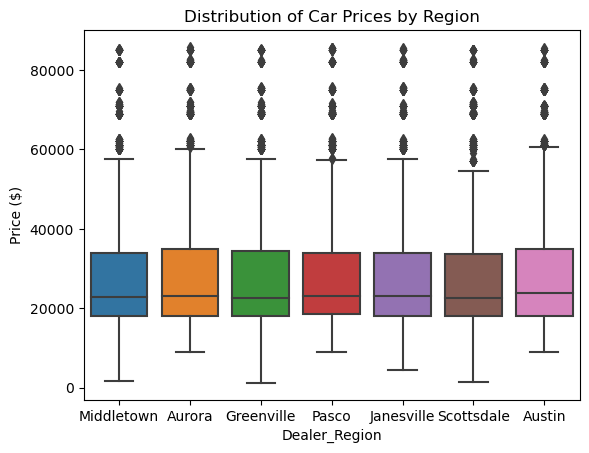

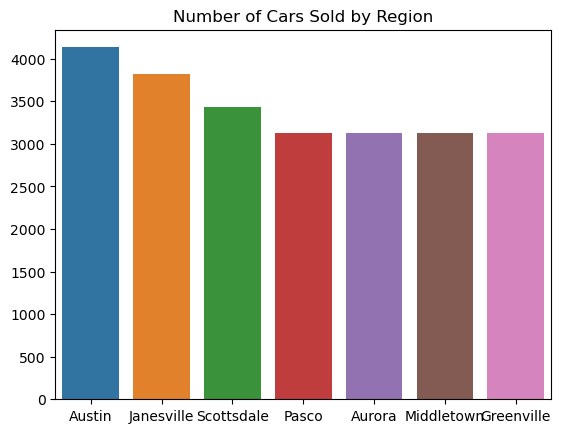

In [27]:
sns.boxplot(x='Dealer_Region', y='Price ($)', data=car_data)
plt.title('Distribution of Car Prices by Region')
plt.show()

cars_sold_by_region = car_data['Dealer_Region'].value_counts()
sns.barplot(x=cars_sold_by_region.index, y=cars_sold_by_region.values)
plt.title('Number of Cars Sold by Region')
plt.show()

# 8. How does the average car price differ between cars with different engine sizes?

In [29]:
avg_price_by_engine = car_data.groupby('Engine')['Price ($)'].mean().sort_values()
print(f"Average car price by engine size:\n{avg_price_by_engine}")

Average car price by engine size:
Engine
Overhead Camshaft            27914.710631
DoubleÂ Overhead Camshaft    28248.525972
Name: Price ($), dtype: float64


# 9. How do car prices vary based on the customer’s annual income bracket?

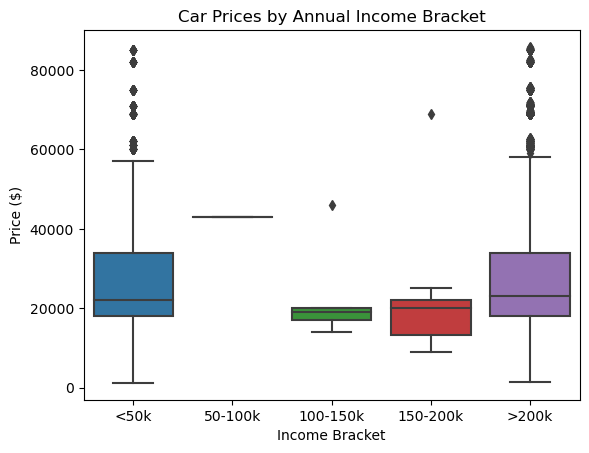

In [30]:
car_data['Income Bracket'] = pd.cut(car_data['Annual Income'], bins=[0, 50000, 100000, 150000, 200000, np.inf], labels=['<50k', '50-100k', '100-150k', '150-200k', '>200k'])
sns.boxplot(x='Income Bracket', y='Price ($)', data=car_data)
plt.title('Car Prices by Annual Income Bracket')
plt.show()

# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

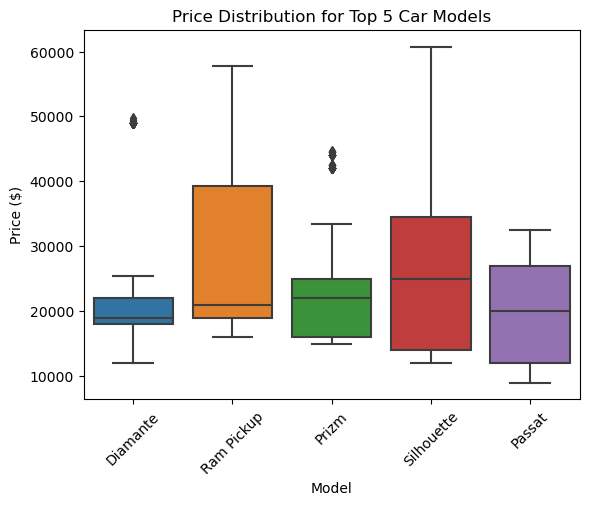

In [31]:
top_models = car_data['Model'].value_counts().head(5).index
top_model_data = car_data[car_data['Model'].isin(top_models)]
sns.boxplot(x='Model', y='Price ($)', data=top_model_data)
plt.title('Price Distribution for Top 5 Car Models')
plt.xticks(rotation=45)
plt.show()

# 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

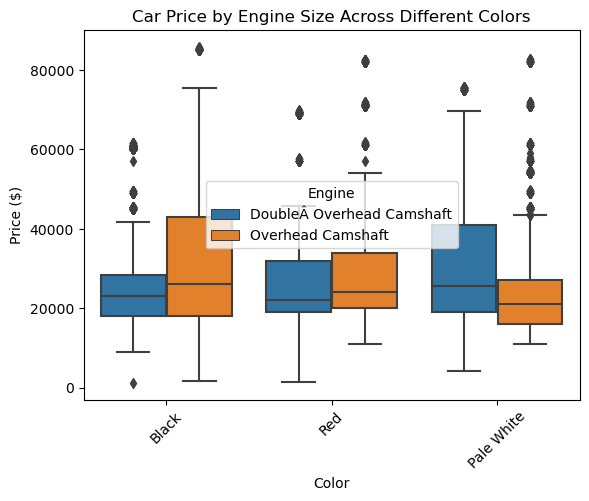

In [32]:
sns.boxplot(x='Color', y='Price ($)', data=car_data, hue='Engine')
plt.title('Car Price by Engine Size Across Different Colors')
plt.xticks(rotation=45)
plt.show()

# 12. Is there any seasonal trend in car sales based on the date of sale?

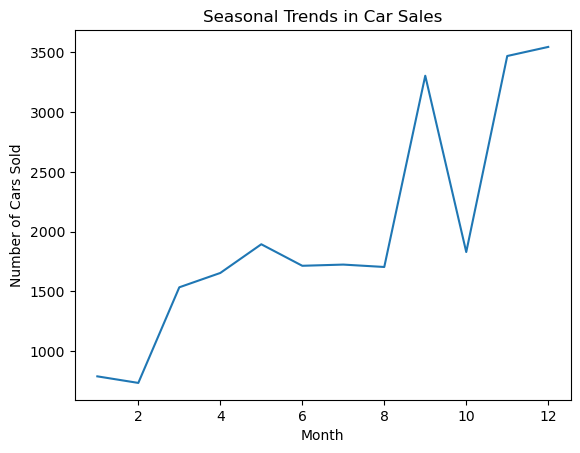

In [33]:
car_data['Date'] = pd.to_datetime(car_data['Date'])
car_data['Month'] = car_data['Date'].dt.month
monthly_sales = car_data['Month'].value_counts().sort_index()
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Seasonal Trends in Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.show()

# 13. How does the car price distribution change when considering different combinations of body style and transmission type?

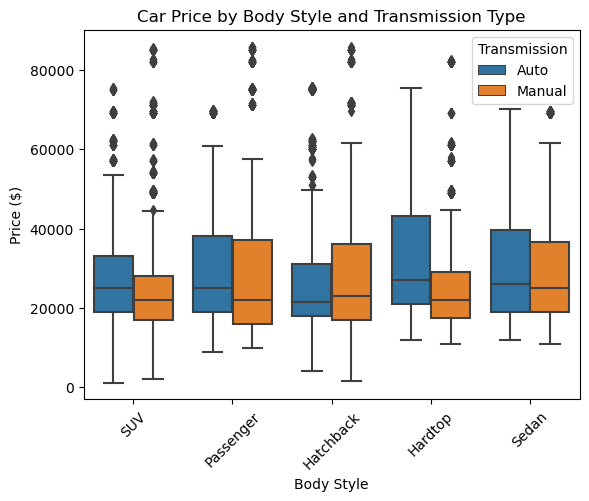

In [34]:
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=car_data)
plt.title('Car Price by Body Style and Transmission Type')
plt.xticks(rotation=45)
plt.show()

# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

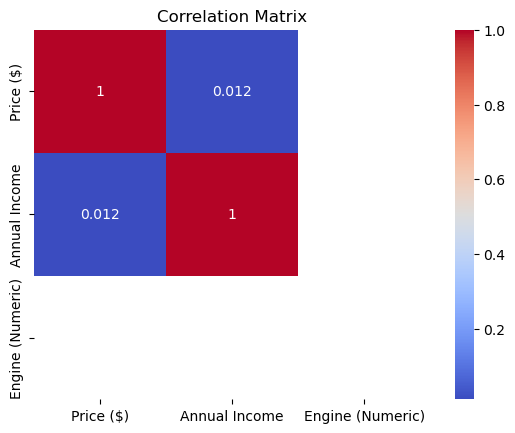

In [35]:
correlation_data = car_data[['Price ($)', 'Annual Income']].copy()
correlation_data['Engine (Numeric)'] = car_data['Engine'].str.extract(r'(\d+)').astype(float) # Extract numeric value from Engine
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 15. How does the average car price vary across different car models and engine types?

In [36]:
avg_price_by_model_engine = car_data.groupby(['Model', 'Engine'])['Price ($)'].mean()
print(f"Average car price by models and engine types:\n{avg_price_by_model_engine}")

Average car price by models and engine types:
Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64


# EDA - 3 : Amazon Sales Data

### This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.
### Source : Amazon Sales

# 1. What is the average rating for each product category?

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('amazon.csv')

# Extract the top-level category
data['top_category'] = data['category'].str.split('|').str[0]

# Convert the 'rating' column to numeric, handling non-numeric values
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Calculate the average rating for each top-level category
average_ratings = data.groupby('top_category')['rating'].mean().sort_values(ascending=False)

# Display the results
print(average_ratings)

top_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Home&Kitchen             4.040716
Health&PersonalCare      4.000000
MusicalInstruments       3.900000
Car&Motorbike            3.800000
Name: rating, dtype: float64


# 2. What are the top rating_count products by category?

In [41]:
# Convert 'rating_count' to numeric, handling non-numeric values
data['rating_count'] = data['rating_count'].str.replace(',', '').astype(float)

# Identify the top product by 'rating_count' for each category
top_products = data.loc[data.groupby('top_category')['rating_count'].idxmax()]

# Display the results
print(top_products[['top_category', 'product_name', 'rating_count']])

               top_category  \
1157          Car&Motorbike   
588   Computers&Accessories   
12              Electronics   
1247    Health&PersonalCare   
1028           Home&Kitchen   
982         HomeImprovement   
613      MusicalInstruments   
659          OfficeProducts   
924              Toys&Games   

                                           product_name  rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1118.0  
588           SanDisk Cruzer Blade 32GB USB Flash Drive      253105.0  
12    AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0  
1247  Dr Trust Electronic Kitchen Digital Scale Weig...        3663.0  
1028  Pigeon Polypropylene Mini Handy and Compact Ch...      270563.0  
982   Gizga Essentials Cable Organiser, Cord Managem...        5985.0  
613   Boya ByM1 Auxiliary Omnidirectional Lavalier C...       68664.0  
659   Casio FX-82MS 2nd Gen Non-Programmable Scienti...       12179.0  
924   Faber-Castell Connector Pen Set - P

# 3. What is the distribution of discounted prices vs. actual prices?

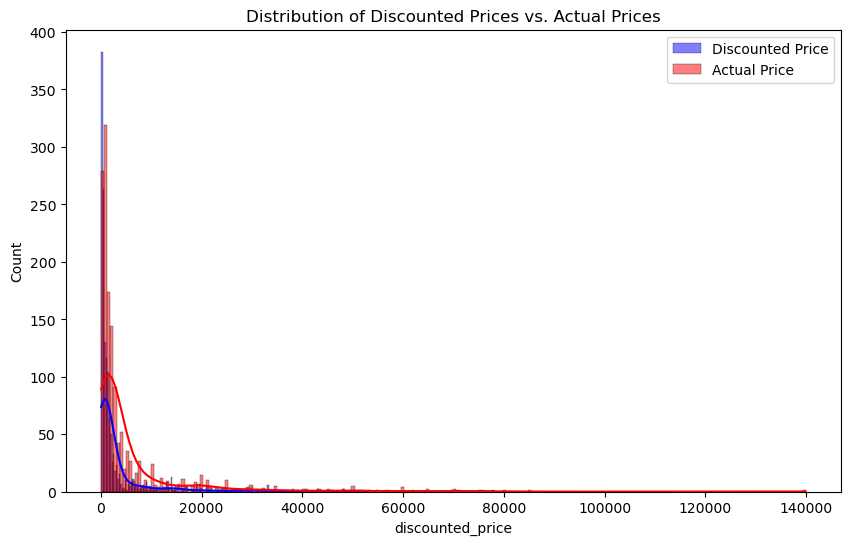

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(data['discounted_price'], color='blue', label='Discounted Price', kde=True)
sns.histplot(data['actual_price'], color='red', label='Actual Price', kde=True)
plt.legend()
plt.title("Distribution of Discounted Prices vs. Actual Prices")
plt.show()

# 4. How does the average discount percentage vary across categories?

In [51]:
# Convert 'discount_percentage' to numeric
data['discount_percentage'] = data['discount_percentage'].str.replace('%', '').astype(float)

# Calculate average discount percentage for each category
average_discount = data.groupby('top_category')['discount_percentage'].mean().sort_values(ascending=False)
print(average_discount)

top_category
HomeImprovement          57.500000
Computers&Accessories    54.024283
Health&PersonalCare      53.000000
Electronics              50.828897
MusicalInstruments       46.000000
Car&Motorbike            42.000000
Home&Kitchen             40.120536
OfficeProducts           12.354839
Toys&Games                0.000000
Name: discount_percentage, dtype: float64


# 5. What are the most popular product names?

In [52]:
# Sort products by rating_count in descending order and display the top
popular_products = data.sort_values(by='rating_count', ascending=False)[['product_name', 'rating_count']].head(10)
print(popular_products)

                                          product_name  rating_count
12   AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      426973.0
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...      426973.0
684  AmazonBasics Flexible Premium HDMI Cable (Blac...      426972.0
400  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
352  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
584  boAt BassHeads 100 in-Ear Wired Headphones wit...      363711.0
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...      313836.0
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...      313836.0
473  Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...      313832.0


# 6. What are the most popular product keywords?

In [53]:
from collections import Counter

# Extract keywords from product names
keywords = data['product_name'].str.split().explode()
popular_keywords = Counter(keywords).most_common(20)

# Display the top keywords
print(popular_keywords)

[('with', 718), ('for', 614), ('|', 457), ('&', 432), ('USB', 342), ('and', 310), ('Cable', 306), ('-', 220), ('Charging', 212), ('Fast', 208), ('to', 202), ('(Black)', 184), ('C', 176), ('Smart', 171), ('Type', 140), ('Compatible', 134), ('HD', 130), ('Data', 128), ('TV', 119), ('Wireless', 114)]


# 7. What are the most popular product reviews?

In [54]:
# Combine review titles and content for more comprehensive analysis
data['full_review'] = data['review_title'] + " " + data['review_content']

# Sort by rating_count to find the most popular reviews
popular_reviews = data.sort_values(by='rating_count', ascending=False)[['full_review', 'rating_count']].head(10)
print(popular_reviews)

                                           full_review  rating_count
12   It's quite good and value for money,Works well...      426973.0
65   It's quite good and value for money,Works well...      426973.0
47   It's quite good and value for money,Works well...      426973.0
684  It's quite good and value for money,Works well...      426972.0
400  Best value for money,HEAD PHONE POUCH NOT RECE...      363713.0
352  Best value for money,HEAD PHONE POUCH NOT RECE...      363713.0
584  Best value for money,HEAD PHONE POUCH NOT RECE...      363711.0
370  Best phone for below normal use,Good mobile fo...      313836.0
371  Best phone for below normal use,Good mobile fo...      313836.0
473  Best phone for below normal use,Good mobile fo...      313832.0


# 8.What is the correlation between discounted_price and rating?

In [56]:
correlation = data[['discounted_price', 'rating']].corr().loc['discounted_price', 'rating']
print(f"Correlation between discounted_price and rating: {correlation}")

Correlation between discounted_price and rating: 0.12033741712288648


# 9. What are the Top 5 categories based on the highest ratings?

In [57]:
# Calculate the average rating for each category
average_ratings = data.groupby('top_category')['rating'].mean().sort_values(ascending=False)

# Display the top 5 categories
top_categories = average_ratings.head(5)
print(top_categories)

top_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Name: rating, dtype: float64


# 10. Identify any potential areas for improvement or optimization based on the data analysis.

In [58]:
# Identify low-rated but popular products
low_rated_popular = data[(data['rating'] < 3) & (data['rating_count'] > data['rating_count'].mean())]
print("Low-rated but popular products:")
print(low_rated_popular[['product_name', 'rating', 'rating_count']])

# Categories with low average ratings
low_rating_categories = average_ratings[average_ratings < 3.5]
print("Categories with low average ratings:")
print(low_rating_categories)

# Analyze common negative reviews
negative_reviews = data[data['rating'] < 3]['review_content'].value_counts().head(10)
print("Common negative reviews:")
print(negative_reviews)

Low-rated but popular products:
Empty DataFrame
Columns: [product_name, rating, rating_count]
Index: []
Categories with low average ratings:
Series([], Name: rating, dtype: float64)
Common negative reviews:
Good Prodat,Battery life is so bad.,Nice product,Dislike product also not return its only replacement,,Iska tauch kaam nahi kar raha hai aur kewal mobile adoptot se charge karne par on dikh raha phir turat band ho ja raha hai.ise wapas karna hai.,पहिल्या दिवसापासूनच ती वॉच ऑन होत नाही. चार्ज केले तरी पण ऑन होत नाही. पुर्णपणे third class वॉच पाठविली Amazon ने. दिवसेंदिवस Amazon ची सर्व्हिस आणि प्रॉडक्ट bad होत चाललेले दिसत आहे.,Bhot Jada ghatia h h,All the products are very good working there is no any issue till now.                                                                                                                                                                                                                                                                               

# EDA - 4 : Spotify Data: Popular Hip-hop Artists and Tracks


### The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape. Each entry not only highlights the popularity and musical composition of the tracks but also underscores the creative prowess of the artists and their profound impact on global listeners.

# 1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful .

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
spotify_data = pd.read_csv('spotify.csv')

# Check for null values and duplicates
print("Checking for null values:")
print(spotify_data.isnull().sum())

# Handle missing values (if any)
spotify_data = spotify_data.dropna()

print("Checking for duplicate rows:")
print(f"Number of duplicate rows: {spotify_data.duplicated().sum()}")

# Remove duplicate rows
spotify_data = spotify_data.drop_duplicates()

Checking for null values:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Checking for duplicate rows:
Number of duplicate rows: 27


# 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

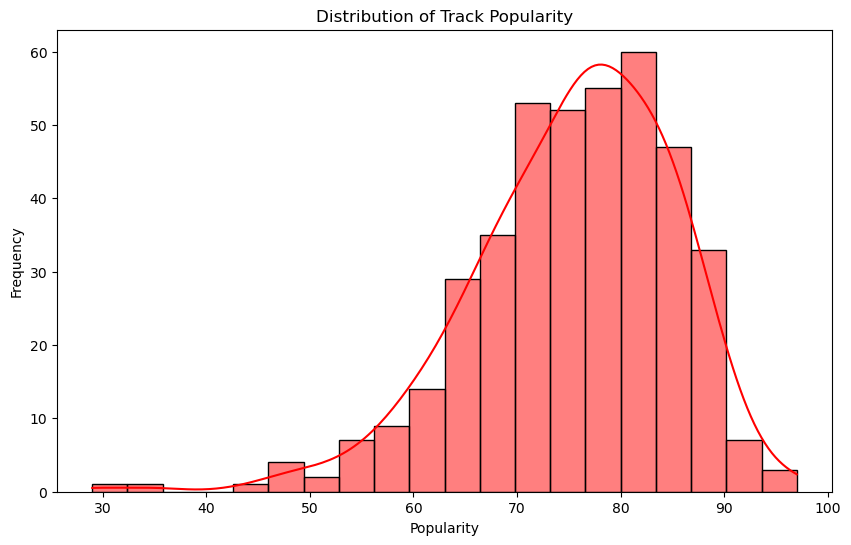

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(spotify_data['Popularity'], bins=20, kde=True, color='red')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

# 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot .

6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist .
7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist .
8. Visualize relationships between multiple numerical variables simultaneously using a pair plot .
9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot .
10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

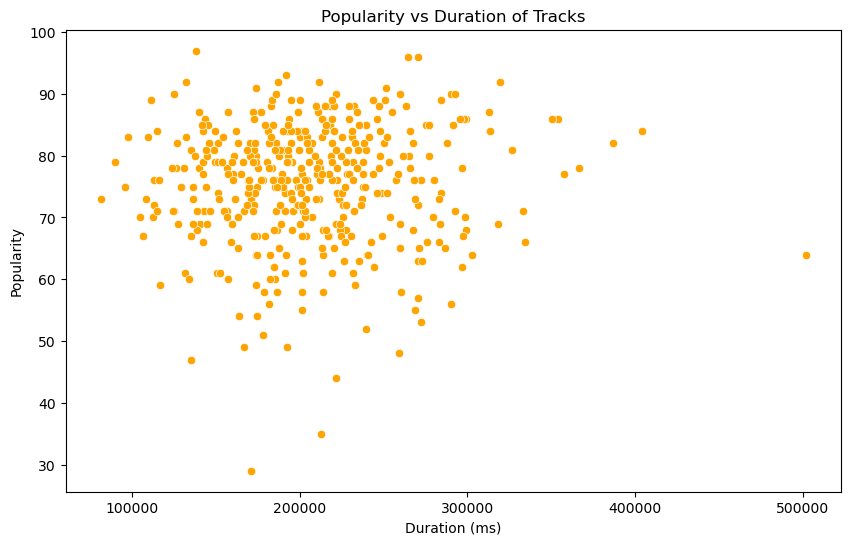

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=spotify_data, color='orange')
plt.title('Popularity vs Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

# 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot .

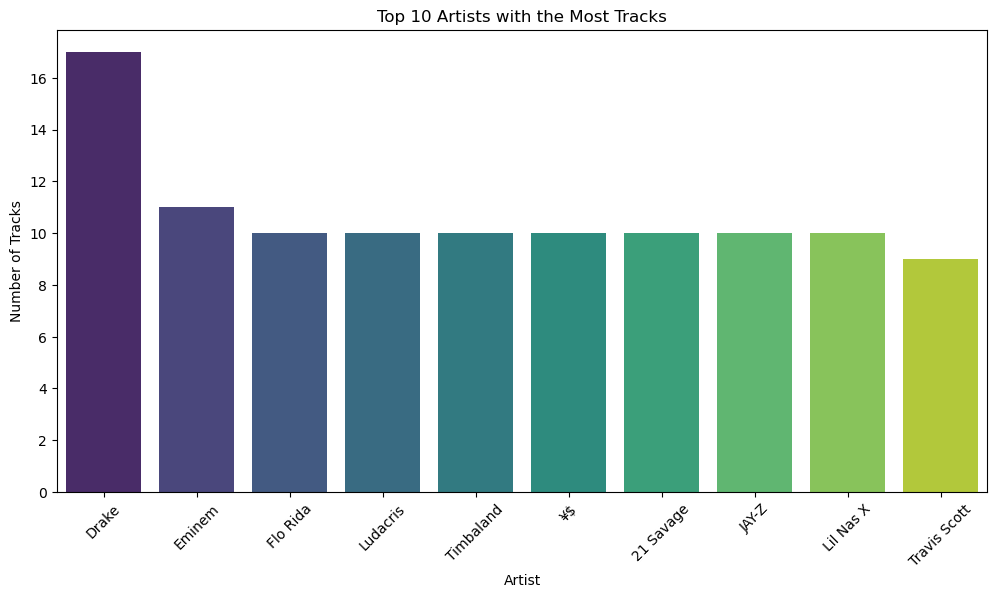

In [65]:
plt.figure(figsize=(12, 6))
track_count = spotify_data['Artist'].value_counts()
sns.barplot(x=track_count.head(10).index, y=track_count.head(10).values, palette='viridis')
plt.title('Top 10 Artists with the Most Tracks')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()

# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [66]:
least_popular_tracks = spotify_data.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks)

Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


# 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist .

In [67]:
top_5_artists = spotify_data['Artist'].value_counts().head(5).index
avg_popularity_top_5 = spotify_data[spotify_data['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean()
most_popular_artist = avg_popularity_top_5.idxmax()
print("Average Popularity for Top 5 Artists:")
print(avg_popularity_top_5)
print(f"Most Popular Artist (by average popularity): {most_popular_artist}")

Average Popularity for Top 5 Artists:
Artist
Drake        82.882353
Eminem       83.636364
Flo Rida     78.000000
Ludacris     63.000000
Timbaland    69.000000
Name: Popularity, dtype: float64
Most Popular Artist (by average popularity): Eminem


# 7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist .

In [68]:
most_popular_tracks = spotify_data[spotify_data['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].idxmax()
print("Most Popular Tracks for Top 5 Artists:")
print(spotify_data.loc[most_popular_tracks, ['Artist', 'Track Name', 'Popularity']])

Most Popular Tracks for Top 5 Artists:
        Artist                               Track Name  Popularity
0        Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
80      Eminem                               Without Me          90
300   Flo Rida                       Low (feat. T-Pain)          84
371   Ludacris                             My Chick Bad          67
380  Timbaland                            The Way I Are          85


# 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot .

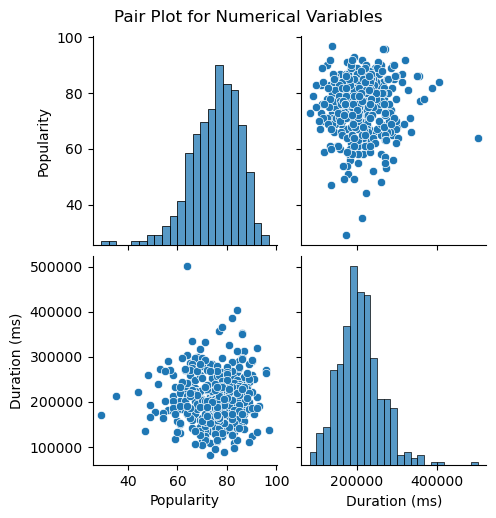

In [69]:
sns.pairplot(spotify_data[['Popularity', 'Duration (ms)']])
plt.suptitle('Pair Plot for Numerical Variables', y=1.02)
plt.show()

# 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot .

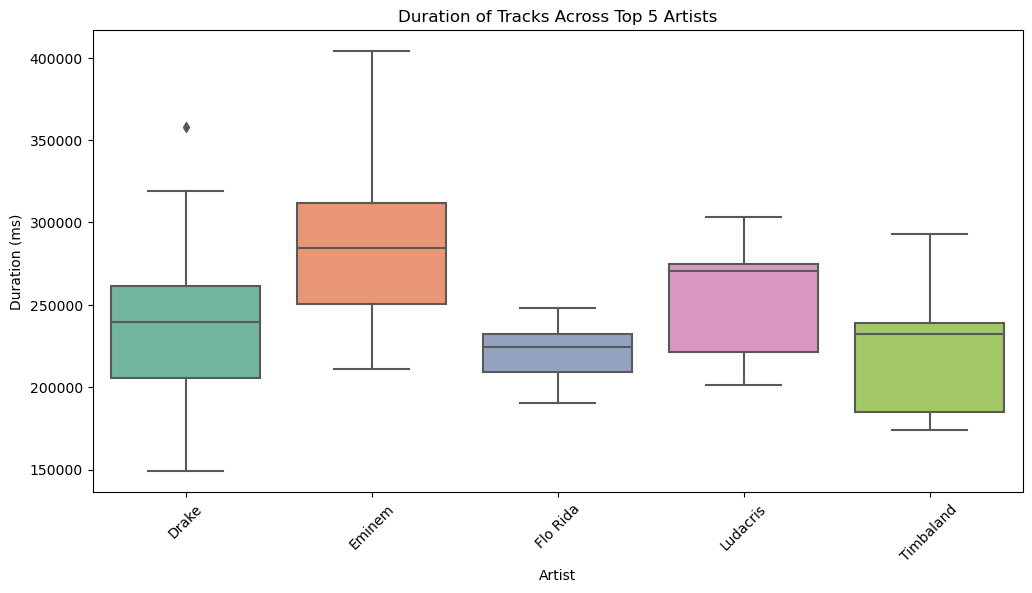

In [70]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=spotify_data[spotify_data['Artist'].isin(top_5_artists)], palette='Set2')
plt.title('Duration of Tracks Across Top 5 Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45)
plt.show()

# 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

C:\Users\HP\AppData\Local\Temp\ipykernel_12612\858308222.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Artist', y='Popularity', data=spotify_data[spotify_data['Artist'].isin(top_5_artists)], palette='viridis')


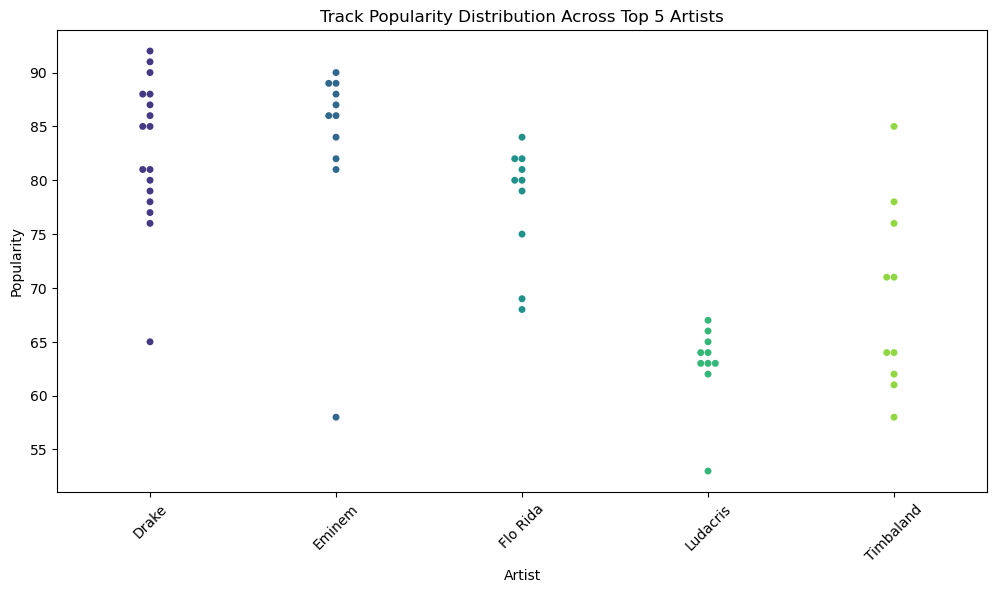

In [72]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Artist', y='Popularity', data=spotify_data[spotify_data['Artist'].isin(top_5_artists)], palette='viridis')
plt.title('Track Popularity Distribution Across Top 5 Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()